In [38]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.preprocessing import text
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from tensorflow.keras.preprocessing import text as keras_text, sequence as keras_seq

In [39]:
data = pd.read_csv('/kaggle/input/duplicatequestion/questions.csv')
pd.set_option('display.max_colwidth',80)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [40]:
data.shape

(404351, 6)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


<Axes: xlabel='is_duplicate'>

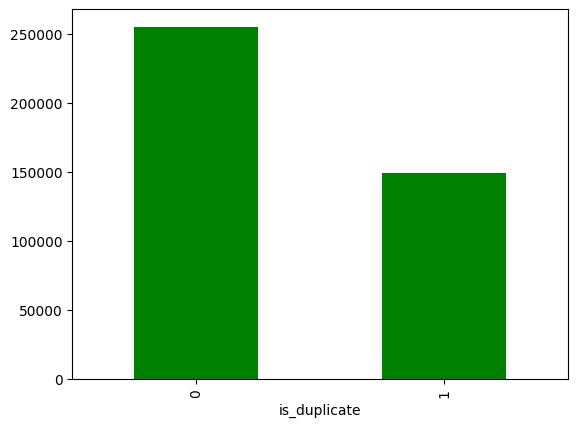

In [41]:
print(data['is_duplicate'].value_counts())

import matplotlib.pyplot as plt
data['is_duplicate'].value_counts().plot(kind='bar', color='green')

In [42]:
print(data.dtypes)
print(data['question1'].dtypes)
print(data['question2'].dtypes)
type(data['question1'])

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object
object
object


pandas.core.series.Series

# Setting target or labelfor each input

In [43]:
label_oneDimension=data['is_duplicate']

In [44]:
label_oneDimension.head(2)

0    0
1    0
Name: is_duplicate, dtype: int64

In [46]:
import numpy as np
label_twoDimension = to_categorical(data['is_duplicate'], num_classes=2)

In [47]:
label_twoDimension[0:1]

array([[1., 0.]])

In [48]:
question_one=data['question1'].astype(str)
print(question_one.head())

0              What is the step by step guide to invest in share market in india?
1                             What is the story of Kohinoor (Koh-i-Noor) Diamond?
2       How can I increase the speed of my internet connection while using a VPN?
3                              Why am I mentally very lonely? How can I solve it?
4    Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Name: question1, dtype: object


In [49]:
question_two=data['question2'].astype(str)
print(question_two.head())

0                          What is the step by step guide to invest in share market?
1    What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...
2                        How can Internet speed be increased by hacking through DNS?
3                  Find the remainder when [math]23^{24}[/math] is divided by 24,23?
4                                            Which fish would survive in salt water?
Name: question2, dtype: object


# Fitting text on a single tokenized object

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(question_one+question_two)
#tok_all.fit_on_texts(question_one+question_two+question_one_test+question_two_test)


In [52]:
vocabulary_all=len(tok_all.word_counts)
print(vocabulary_all)

89985


# Train data Sequencing and Encoding

In [53]:
#Encoding question 1
encoded_q1=tok_all.texts_to_sequences(question_one)
print(question_one[0])
encoded_q1[0]

What is the step by step guide to invest in share market in india?


[2, 3, 1, 1226, 59, 1226, 2566, 7, 579, 8, 763, 384, 8, 36]

In [54]:
#Encoding question 2
encoded_q2=tok_all.texts_to_sequences(question_two)
print(question_two[0])
encoded_q2[0]

What is the step by step guide to invest in share market?


[2, 3, 1, 1226, 59, 1226, 2566, 7, 579, 8, 763, 384]

# Pre-Padding on Train data

In [55]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q1 = sequence.pad_sequences(encoded_q1, maxlen=max_length, padding='pre')

In [56]:
#####Padding encoded sequence of words
from keras.preprocessing import sequence
max_length=100
padded_docs_q2 = sequence.pad_sequences(encoded_q2, maxlen=max_length, padding='pre')

# Encoding on Test data

In [57]:
'''
#Encoding question 1
encoded_q1_test=tok_all.texts_to_sequences(question_one_test)
print(question_one_test[0])
encoded_q1_test[0]
'''

'\n#Encoding question 1\nencoded_q1_test=tok_all.texts_to_sequences(question_one_test)\nprint(question_one_test[0])\nencoded_q1_test[0]\n'

In [58]:
'''#Encoding question 1
encoded_q2_test=tok_all.texts_to_sequences(question_two_test)
print(question_two_test[0])
encoded_q2_test[0]'''

'#Encoding question 1\nencoded_q2_test=tok_all.texts_to_sequences(question_two_test)\nprint(question_two_test[0])\nencoded_q2_test[0]'

# Pre-Padding on test data

In [146]:
'''#####Padding encoded sequence of words
padded_docs_q1_test = sequence.pad_sequences(encoded_q1_test, maxlen=max_length, padding='pre')
padded_docs_q2_test = sequence.pad_sequences(encoded_q2_test, maxlen=max_length, padding='pre')'''

"#####Padding encoded sequence of words\npadded_docs_q1_test = sequence.pad_sequences(encoded_q1_test, maxlen=max_length, padding='pre')\npadded_docs_q2_test = sequence.pad_sequences(encoded_q2_test, maxlen=max_length, padding='pre')"

# Reading Embedding Vector from Glove

In [59]:
import os
import numpy as np

In [61]:
embeddings_index = {}
f = open('/kaggle/input/glove-360/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [63]:
# embedding_matrix = np.zeros((vocabulary_all+1, 300))
embedding_dim = 100  # Change this to match your pre-trained embedding size
embedding_matrix = np.zeros((vocabulary_all + 1, embedding_dim))

for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

# Defining Input Shape for Model

In [64]:
Question1_shape= Input(shape=[max_length])
Question1_shape.shape

(None, 100)

In [65]:
Question2_shape= Input(shape=[max_length])
Question2_shape.shape

(None, 100)

# Embedding Layer

In [67]:
# Embedding_Layer = Embedding(vocabulary_all+1,300,weights=[embedding_matrix], input_length=max_length, trainable=False)

embedding_dim = 100  # Match this to your pre-trained embeddings
Embedding_Layer = Embedding(vocabulary_all + 1, embedding_dim, weights=[embedding_matrix], trainable=False)


# CNN Network

In [68]:
CNN2_network=Sequential([Embedding_Layer,
                        Conv1D(32,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,5,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(128,activation="linear"),
                       Dropout(0.3)
                       
                       ])

# Printing Model summary

In [69]:
CNN2_network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       8,998,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,998,600 (34.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,998,600 (34.33 MB)

# create siamese network from CNN model and store output feature vectors

In [71]:
Question1_CNN_feature=CNN2_network(Question1_shape)
Question2_CNN_feature=CNN2_network(Question2_shape)

# Adding and multiplying features obtained from Siamese CNN network

In [72]:
from keras import backend as K
from keras.optimizers import Adam

In [74]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda

# Define absolute difference
lamda_function = Lambda(lambda tensor: K.abs(tensor[0] - tensor[1]),
                        name="Absolute_distance",
                        output_shape=lambda input_shape: input_shape[0])

abs_distance_vector = lamda_function([Question1_CNN_feature, Question2_CNN_feature])

# Define Hadamard product (element-wise multiplication)
lamda_function2 = Lambda(lambda tensor: tensor[0] * tensor[1],  # No need for K.abs here
                         name="Hadamard_multiplication",
                         output_shape=lambda input_shape: input_shape[0])

hamadard_vector = lamda_function2([Question1_CNN_feature, Question2_CNN_feature])


# Adding abs_distance_vector and hamadard_vector

In [75]:
from keras.layers import Add

In [76]:
added_vecotr = Add()([abs_distance_vector, hamadard_vector])

# Final Model prediction

In [77]:
predict=Dense(2,activation="sigmoid")(added_vecotr)

# Creating sequential model using Model() class and compilation

In [79]:
from tensorflow.keras.optimizers import Adam  # Ensure correct import

Siamese1_Network = Model(inputs=[Question1_shape, Question2_shape], outputs=predict)
Siamese1_Network.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.00003), metrics=["accuracy"])


In [80]:
Siamese2_Network.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 128)            │      9,223,464 │ input_layer_3[0][0],   │
│                           │                        │                │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Absolute_distance         │ (None, 128)            │              0 │ sequential_1[0][0],    │
│ (Lambda)                  │                        │                │ sequential_1[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Hadamard_multiplication   │ (None, 128)            │              0 │ sequential_1[0][0],    │
│ (Lambda)                  │                        │                │ sequential_1[1][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 128)            │              0 │ Absolute_distance[0][… │
│                           │                        │                │ Hadamard_multiplicati… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 2)              │            258 │ add_1[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,223,722 (35.19 MB)

 Trainable params: 225,122 (879.38 KB)

 Non-trainable params: 8,998,600 (34.33 MB)

# Setting hyperparameter for training

In [82]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)
#checkpointer = ModelCheckpoint(filepath = 'cnn_model_one_.{epoch:02d}-{val_loss:.6f}.hdf5',
 #                              verbose=1,
 #                              save_best_only=True, save_weights_only = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

# Data split into train and validation set

In [83]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
q1_train, q1_val,q2_train, q2_val, label_train, label_val, label_oneD_train, label_oneD_val = train_test_split(padded_docs_q1,padded_docs_q2, label_twoDimension, label_oneDimension, test_size=0.30,
random_state=42)

# Model fitting or training

In [85]:
from tensorflow.keras.optimizers import Adam  # Ensure correct import

Siamese2_Network.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.00003),  # Use learning_rate instead of lr
    metrics=["accuracy"]
)

history = Siamese2_Network.fit(
    [q1_train, q2_train], label_train,
    batch_size=32, epochs=100,
    validation_data=([q1_val, q2_val], label_val),
    callbacks=[earlystopper, reduce_lr]
)


Epoch 1/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.6453 - loss: 0.6243 - val_accuracy: 0.6889 - val_loss: 0.6088 - learning_rate: 3.0000e-05
Epoch 2/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6908 - loss: 0.5850 - val_accuracy: 0.6941 - val_loss: 0.5909 - learning_rate: 3.0000e-05
Epoch 3/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7017 - loss: 0.5719 - val_accuracy: 0.7022 - val_loss: 0.5811 - learning_rate: 3.0000e-05
Epoch 4/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7082 - loss: 0.5620 - val_accuracy: 0.7115 - val_loss: 0.5769 - learning_rate: 3.0000e-05
Epoch 5/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7168 - loss: 0.5534 - val_accuracy: 0.7121 - val_loss: 0.5710 - learning_rate: 3.0000e-05
Epoch 6/100
8846/8846 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7207 - loss: 0.5477 - val_accuracy: 0.7136 - val_loss: 0.5655 - learning_rate: 3.0000e-05
Epoch 7/100
8846/8846 ━━━━━━━━━━━━━━━━━━

In [87]:
Siamese2_Network.save("cnn2.h5")  

# Model Prediction

In [88]:
Siamese2_Network_predictions = Siamese2_Network.predict([q1_val,q2_val])
#Siamese2_Network_predictions = Siamese2_Network.predict([padded_docs_q1_test,padded_docs_q2_test])

3791/3791 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [ ]:
#Siamese2_Network_predictions_testData = Siamese2_Network.predict([padded_docs_q1_test,padded_docs_q1_test])

# Log loss

In [89]:
from sklearn.metrics import log_loss
log_loss_val= log_loss(label_val,Siamese2_Network_predictions)
log_loss_val

0.4885447773684157

# Classification report

In [90]:
predictions = np.zeros_like(Siamese2_Network_predictions)
predictions[np.arange(len(Siamese2_Network_predictions)), Siamese2_Network_predictions.argmax(1)] = 1

In [91]:
predictionInteger=(np.argmax(predictions, axis=1))
#print('np.argmax(a, axis=1): {0}'.format(np.argmax(predictions, axis=1)))
predictionInteger

array([0, 0, 0, ..., 1, 1, 1])

In [92]:
from sklearn.metrics import classification_report
print(classification_report(label_val,predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     76539
           1       0.76      0.53      0.62     44767

   micro avg       0.76      0.76      0.76    121306
   macro avg       0.76      0.72      0.73    121306
weighted avg       0.76      0.76      0.75    121306
 samples avg       0.76      0.76      0.76    121306



In [93]:
from sklearn.metrics import precision_recall_fscore_support
print ("Precision, Recall, F1_score : macro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='macro'))
print ("Precision, Recall, F1_score : micro ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='micro'))
print ("Precision, Recall, F1_score : weighted ",precision_recall_fscore_support(label_oneD_val,predictionInteger, average='weighted'))

Precision, Recall, F1_score : macro  (0.7627637106153404, 0.7156327860597572, 0.7261776728147842, None)
Precision, Recall, F1_score : micro  (0.7644139613869059, 0.7644139613869059, 0.7644139613869059, None)
Precision, Recall, F1_score : weighted  (0.7636540748239089, 0.7644139613869059, 0.752977658707426, None)


# Final train and val loss

In [95]:
min_val_loss = min(history.history["val_loss"])
min_train_loss = min(history.history["loss"])
max_val_acc = max(history.history["val_accuracy"])
max_train_acc = max(history.history["accuracy"])
print("min_train_loss=%g, min_val_loss=%g, max_train_acc=%g, max_val_acc=%g" % (min_train_loss,min_val_loss,max_train_acc,max_val_acc))

min_train_loss=0.46295, min_val_loss=0.48723, max_train_acc=0.774774, max_val_acc=0.766112


# Plot epoch Vs loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

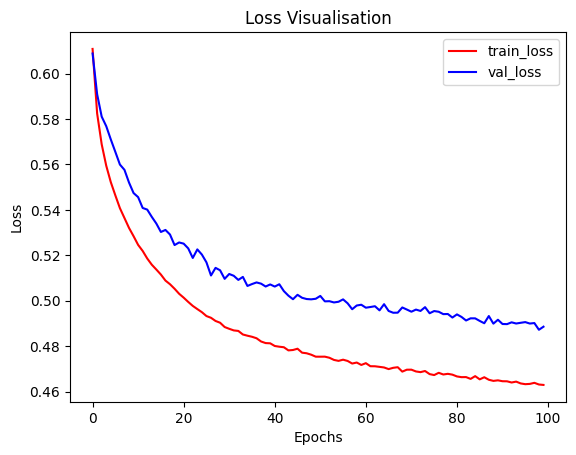

In [96]:
from matplotlib import pyplot as plt
plt.plot(history.history["loss"],color = 'red', label = 'train_loss')
plt.plot(history.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('2Layer_CNN_lossPlot_siamese.pdf',dpi=1000)

from google.colab import files
files.download('2Layer_CNN_lossPlot_siamese.pdf') 

# Plot Epoch Vs Accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

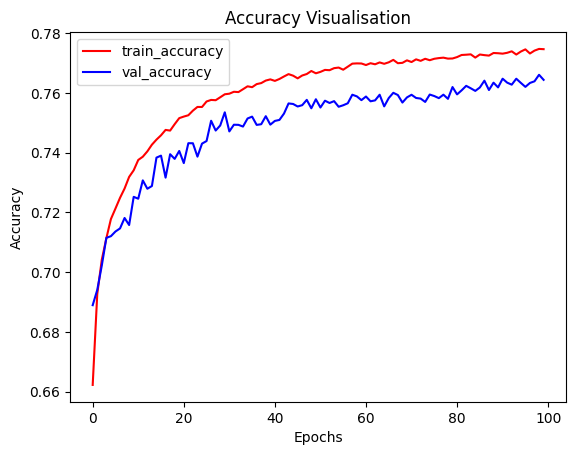

In [97]:
plt.plot(history.history["accuracy"],color = 'red', label = 'train_accuracy')
plt.plot(history.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('2Layer_CNN_accuracyPlot_siamese.pdf',dpi=1000)
files.download('2Layer_CNN_accuracyPlot_siamese.pdf') 

# Area Under Curve- ROC

In [98]:
#pred_test = Siamese2_Network.predict([padded_docs_q1_test,padded_docs_q2_test])
pred_train = Siamese2_Network.predict([q1_train,q2_train])
pred_val = Siamese2_Network.predict([q1_val,q2_val])

8846/8846 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
3791/3791 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

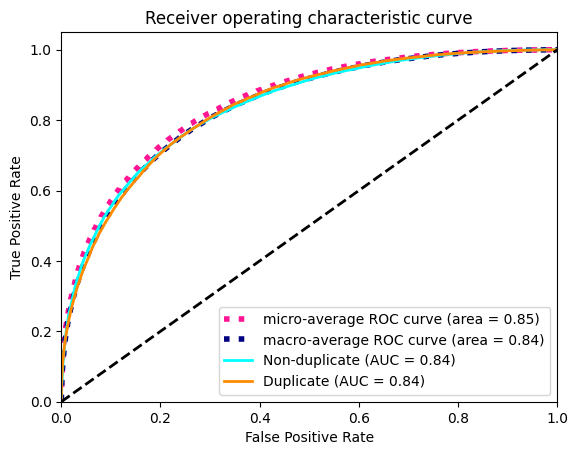

In [101]:
plot_AUC_ROC(label_val,pred_val)

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [103]:
auc_val = roc_auc_score(label_val,pred_val)
accuracy_val = accuracy_score(label_val,pred_val>0.5)
auc_train = roc_auc_score(label_train,pred_train)
accuracy_train = accuracy_score(label_train,pred_train>0.5)

print("auc_train=%g, auc_val=%g, accuracy_train=%g, accuracy_val=%g" % (auc_train, auc_val, accuracy_train, accuracy_val))

auc_train=0.863239, auc_val=0.838628, accuracy_train=0.780932, accuracy_val=0.763235
